# TP 1 - Les fondamentaux

**Les exercices du TP 1 portent sur :**
- Régression linéaire
- Régression polynomale
- Régression logistique

## Utilisation de Jupyter Notebook

Le principe est simple : 
 - Chaque notebook est constitué d’une liste de **cellules**
 - Chacune peut contenir du **texte formaté** ou du **code** (Python, dans notre cas)
 - On **exécute** une cellule de code -> le résultat s’affiche sous la cellule

Cliquez sur le menu **Help** > **User Interface Tour** pour un tour rapide de l’interface.    

Pour vous entraîner :
- **Insérez** quelques cellules de code au début du notebook
- Exécutez quelques commandes Python, telles que **print("Hello world!")** :
    - Cliquez dans une cellule de code et saisissez le code à exécuter
    - Exécutez le code de la cellule en tapant Shift-Entrée ou en cliquant sur le bouton d’exécution
    
Lorsque vous **cliquez** à l’intérieur d’une cellule, vous passez en mode **édition** (la cellule est alors encadrée en *vert*). Lorsque vous tapez la **touche Echap** (Esc) ou que vous cliquez juste à gauche de la cellule, vous passez en mode **commande** (la cellule est alors encadrée en *bleu*). 

Lorsque vous êtes en **mode commande**, tapez la **touche H** pour afficher les nombreux **raccourcis clavier** disponibles

## Préparation

Tout d'abord, assurons-nous que ce bloc-notes fonctionne bien en python 3, importons quelques modules communs, assurons-nous que MatplotLib trace des figures :

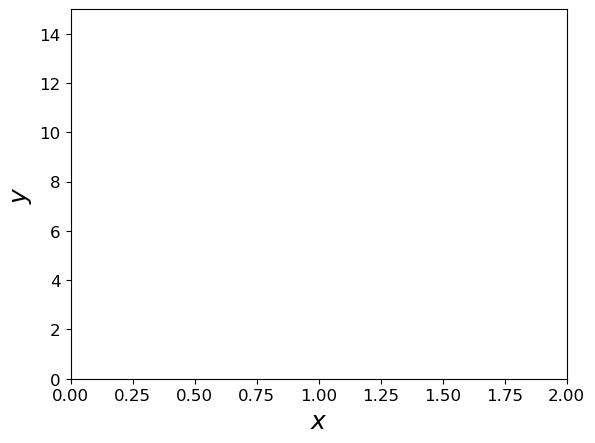

In [331]:
# Pour soutenir à la fois python 2 et python 3
from __future__ import division, print_function, unicode_literals

# Importations communes
import numpy as np
import os

# Pour que la production soit stable d'un bout à l'autre
np.random.seed(42)

# Pour tracer de jolis figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=90, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

# Exercice 1 : Régression linéaire

L'objectif de cet exercice est d'anticiper le nombre d'heures à jouer à un jeu vidéo pour atteindre un minimum nombre de point.
Pour cela, des mesures ont été faite sur plusieurs joueurs.


In [332]:
import numpy as np

X=np.loadtxt('jeuVideo1.csv')
y=np.loadtxt('jeuVideo2.csv')
y.shape

(100,)

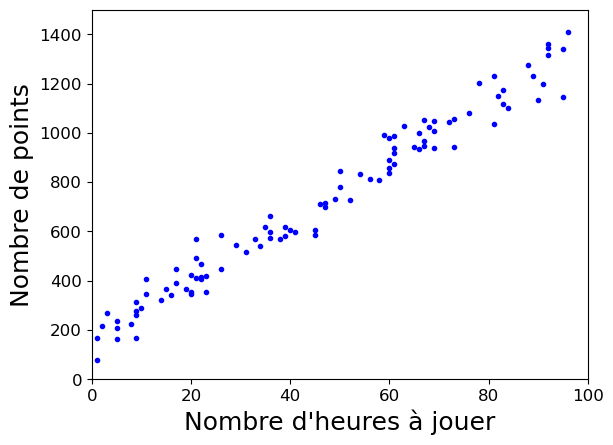

In [333]:
plt.plot(X, y, "b.")
plt.xlabel("Nombre d'heures à jouer", fontsize=18)
plt.ylabel("Nombre de points", rotation=90, fontsize=18)
plt.axis([0, 100, 0, 1500])
plt.show()


### Equation normale

__QUESTION 1.1 :__ Trouver les paramètres **$\theta$** de l'**équation normale**. 

*Aide :*
1. L'équation normale est $\theta=(X^T.X)^{-1}.X^T.y$
2. **X** doit être converti vecteur numpy : **X_b = np.c_[np.ones((100, 1)), X]**
3. Utiliser la fonction **np.linalg.inv(A)** pour calculer l'inverse de **A**
4. Utiliser **A.T** pour calculer la transposée de **A**
5. Pour calculer la multiplication de A par B, utiliser **A@B**

Appelé cette variable **theta_best**

In [334]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # formule : theta_best = (X_b.T * X_b)^(-1) * X_b.T * y

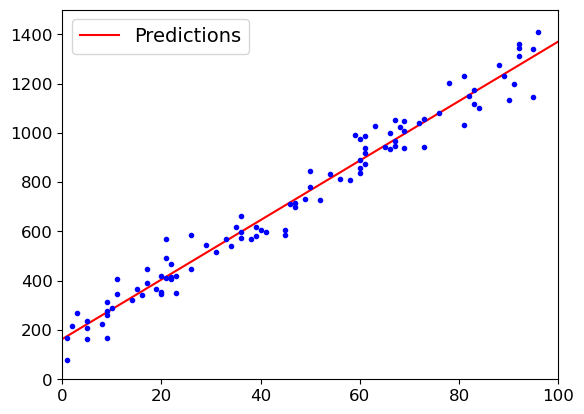

array([163.23492932,  12.07314848])

In [335]:
X_new = np.array([[0], [100]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 100, 0, 1500])
plt.show()
theta_best

__QUESTION 1.2 :__ Une fois que vous connaissez ses paramètres, quel est le temps minimum à jouer au jeu vidéo pour atteindre 1000 points ?

*Aide :*
1. L'équation est $Y=\theta_0+\theta_1.X$
2. Pour obtenir la valeur $i$ de $\theta$, utiliser: **theta[i]**

In [336]:
# Y = theta[0] + theta[1] * X
Y = theta_best[0] + theta_best[1] * 100
print(Y)


1370.549776909992


### Descentes de gradient

Effectuer le même calcul avec les méthodes de descente de gradient
- Dessente de gradient classique
- Descente de gradient par batch
- Descente de gradient stochastique

*a) Descente de gradient classique*

Le code ci-dessous permet de faire une descente de gradient classique comme vu en cours, c'est-à-dire en calculant $\frac{\partial }{\partial \theta_i}MSE(\theta)=\frac{2}{m}\sum_{i=1}^m(\theta^t.x^{(i)}-y^{(i)})x_j^{(i)}$

In [337]:
theta_path_bgd = []
def plot_gradient_descent(theta, eta, n_iterations, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        gtheta = theta
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)
    return theta

__QUESTION 1.3 :__ Dans le programme ci-dessous, le code n'arrive pas à convergence, changer les valeurs de $\eta$ et $n$ pour arriver à convergence.

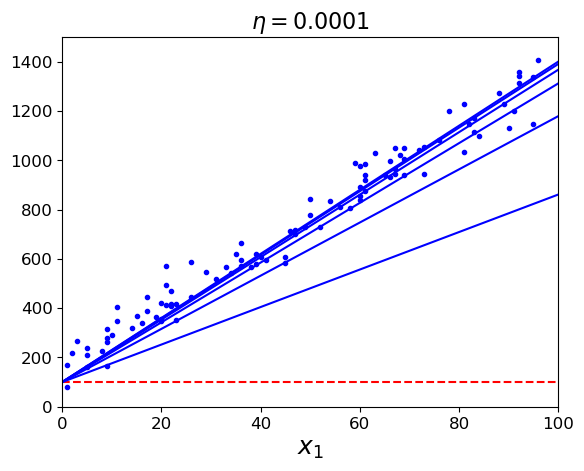

In [338]:
theta = np.array([100, 0])
theta = plot_gradient_descent(theta, eta=0.0001, n_iterations = 7)
plt.axis([0, 100, 0, 1500])
plt.show()

__QUESTION 1.4 :__ Quelles sont les valeurs des paramètres du modèle obtenu ($\theta_i$) ?

In [339]:
theta

array([100.23051632,  13.04317394])

*b) Descente de gradient stochastique*

Le code ci-dessous permet de faire une descente de gradient stochastique comme vu en cours :

In [340]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)
def learning_schedule(t):
    return t0 / (t + t1)


def plot_stochastic_gradient_descent(eta, n_epochs):

    theta = np.array([100, 0])

    for epoch in range(n_epochs):
        for i in range(m):
            if epoch == 0 and i < 20:                    
                y_predict = X_new_b.dot(theta)           
                style = "b-" if i > 0 else "r--"       
                plt.plot(X_new, y_predict, style)        
            random_index = np.random.randint(m)
            xi = X_b[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            eta = learning_schedule(epoch * m + i)
            theta = theta - eta * gradients
            theta_path_sgd.append(theta)  
            
    plt.plot(X, y, "b.")                                 
    plt.xlabel("$x_1$", fontsize=18)                    
    plt.ylabel("$y$",  fontsize=18)          
    plt.axis([0, 100, 0, 1500])                             
    plt.show()  
    return theta

__QUESTION 1.5 :__ Dans le programme ci-dessous, le code n'arrive pas à convergence, changer les valeurs de $\eta$, $n_{epochs}$, $t_0$ et $t_1$ pour arriver à convergence.

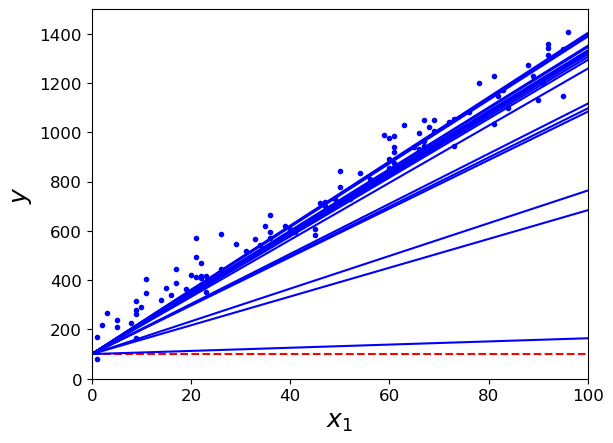

array([100.88316827,  12.47219957])

In [341]:
n_epochs = 5
eta=0.0001
t0, t1 = 0.05, 1000  # learning schedule hyperparameters

plot_stochastic_gradient_descent(eta, n_epochs)

__QUESTION 1.6 :__ Quelles sont les valeurs des paramètres du modèle obtenu ($\theta_i$) ?

In [342]:
theta

array([100.23051632,  13.04317394])

*c) Mini-batch gradient descent*

Le code ci-dessous permet de faire une descente de gradient stochastique comme vu en cours :

In [343]:
theta_path_mgd = []

np.random.seed(42)

t0, t1 = 0.1, 1000
def learning_schedule(t):
    return t0 / (t + t1)

def MiniBatchGradientDescent(n_iterations, minibatch_size):
    theta = np.array([100, 0])
    t = 0
    for epoch in range(n_iterations):
        shuffled_indices = np.random.permutation(m)
        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        for i in range(0, m, minibatch_size):
            t += 1
            xi = X_b_shuffled[i:i+minibatch_size]
            yi = y_shuffled[i:i+minibatch_size]
            gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
            eta = learning_schedule(t)
            theta = theta - eta * gradients
            theta_path_mgd.append(theta)
            if epoch == 0 and i < 20:                    
                y_predict = X_new_b.dot(theta)           
                style = "b-" if i > 0 else "r--"       
                plt.plot(X_new, y_predict, style)            
    plt.plot(X, y, "b.")                                 
    plt.xlabel("$x_1$", fontsize=18)                    
    plt.ylabel("$y$",  fontsize=18)          
    plt.axis([0, 100, 0, 1500])                             
    plt.show()        

__QUESTION 1.7 :__ Dans le programme ci-dessous, le code n'arrive pas à convergence, changer les valeurs de $n_{iterations}$ et $minibatch_{size}$

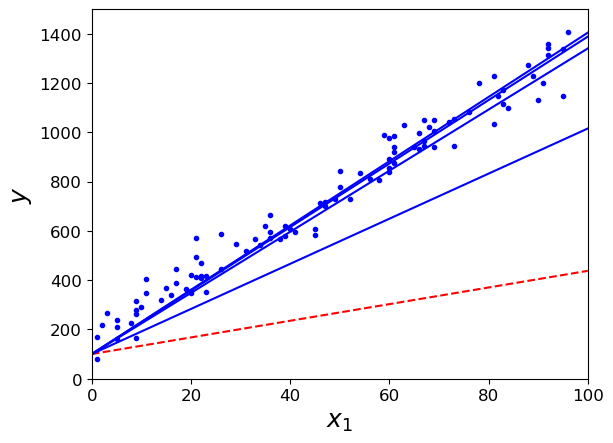

In [344]:
n_iterations = 5000
minibatch_size = 4

MiniBatchGradientDescent(n_iterations, minibatch_size)

# Exercice 2 - Regression polynomiale 

L'objectif de cet exercice est d'anticiper le nombre de vues d'une vidéo YouTube en fonction du temps écoulé depuis qu'elle a été mise en ligne.

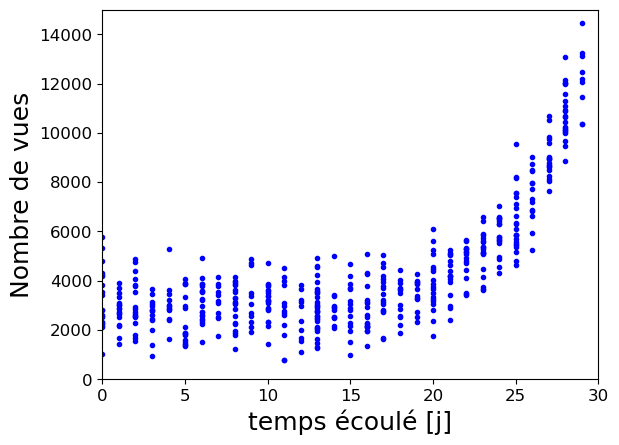

In [345]:
arr=np.loadtxt('videoYouTube1.csv', delimiter=',')
m=len(arr)
X=arr.reshape(m,1)
arr=np.loadtxt('videoYouTube2.csv', delimiter=',')
y=arr.reshape(m,1)
plt.plot(X, y, "b.")
plt.xlabel("temps écoulé [j]", fontsize=18)
plt.ylabel("Nombre de vues", rotation=90, fontsize=18)
plt.axis([0, 30, 0, 15000])
plt.show()

Le code ci-dessous permet de calculer une régression polynomiale comme vu en cours,

In [346]:

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def createPoly(myDegree,biais):
    poly_features = PolynomialFeatures(degree=myDegree, include_bias=biais)
    return poly_features

def regPoly(poly_features):
    X_poly = poly_features.fit_transform(X)

    lin_reg = LinearRegression()
    lin_reg.fit(X_poly, y)

    X_new=np.linspace(0, 30, 100).reshape(100, 1)
    X_new_poly = poly_features.transform(X_new)
    print(X_new_poly.shape)
    y_new = lin_reg.predict(X_new_poly)

    plt.plot(X, y, "b.")
    plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
    plt.xlabel("temps écoulé [j]", fontsize=18)
    plt.ylabel("Nombre de vues", rotation=90, fontsize=18)
    plt.legend(loc="upper left", fontsize=14)
    plt.axis([0, 30, 0, 10000])
    plt.show()
    return lin_reg

**QUESTION 2.1 :** Dans le programme ci-dessous, trouver une bonne valeur de degré de polynome ainsi qu'un bon paramètre de biais pour établir le modèle.

(100, 3)


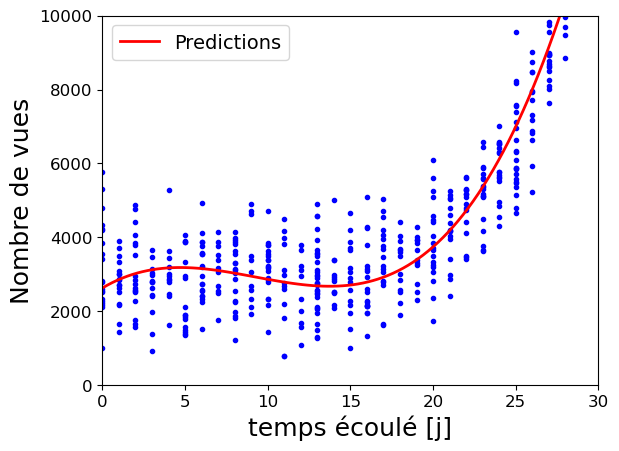

In [347]:
# Construit un polynome
poly_features = createPoly(3,False)
# Construit un modèle de regression sur ce polynome
lin_reg=regPoly(poly_features)

QUESTION 2.2 : A quel nombre de vues peut-on s'attendre 25 jours après la mise en ligne ?

In [348]:
# Applique le polynome en un point
X_poly = poly_features.fit_transform([[25]])
# Prédit la valeur en ce point
print(lin_reg.predict(X_poly)[0][0], "vues")

6995.837978611487 vues


**QUESTION 2.3 :** A quel nombre de vues peut-on s'attendre 100 jours après la mise en ligne ?
    Que pensez-vous de se nombre et que penser de l'**extrapolation** par rapport à l'**interpolation** ?

In [349]:
# Applique le polynome en un point
X_poly = poly_features.fit_transform([[100]])
# Prédit la valeur en ce point
print(lin_reg.predict(X_poly)[0][0], "vues")

1021778.4553299386 vues


La valeur de l'extrapolation est de l'ordre de 1e6, ce qui est très élevé par rapport aux valeurs de l'interpolation. Cela signifie que le modèle n'est pas adapté à l'extrapolation.

Voici le code pour tracer une courbe d'apprentissage :

In [350]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

total=50

X=X[1:total]
y=y[1:total]

def plot_learning_curves(model, taille):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=taille, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)            

**QUESTION 2.4 :** Trouver un modèle qui sous-ajuste

(100, 1)


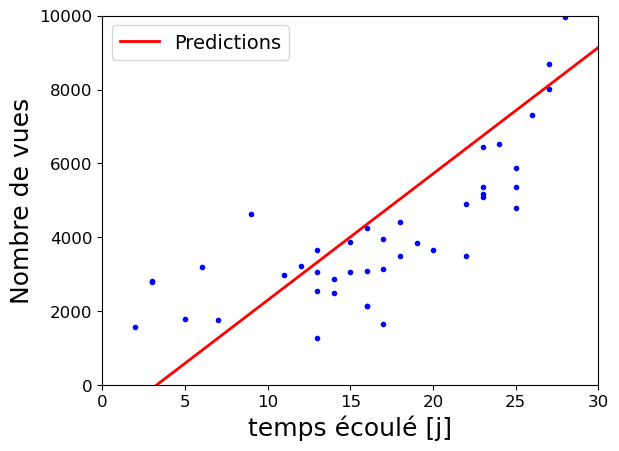

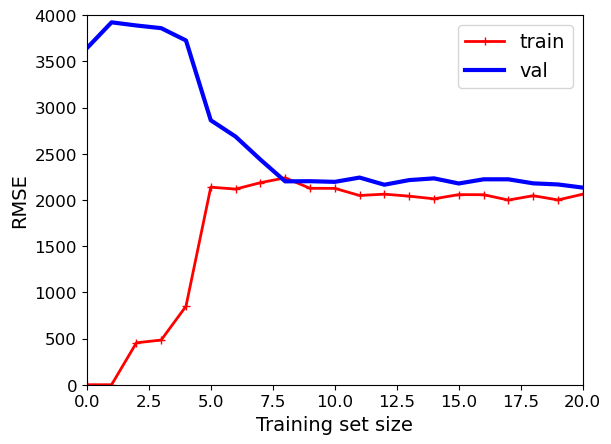

In [351]:
# Paramètres
rang=1
taille=0.4
# Construit un polynome
poly_features = createPoly(rang,False)
# Construit un modèle de regression sur ce polynome
lin_reg=regPoly(poly_features)
plot_learning_curves(lin_reg, taille)
plt.axis([0, total*taille, 0, 4000])                         
plt.show()                                      

**QUESTION 2.5 :** Trouver un modèle qui sur-ajuste

(100, 100)


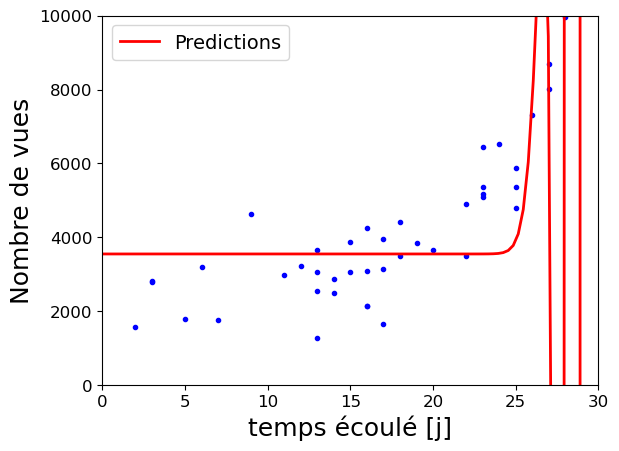

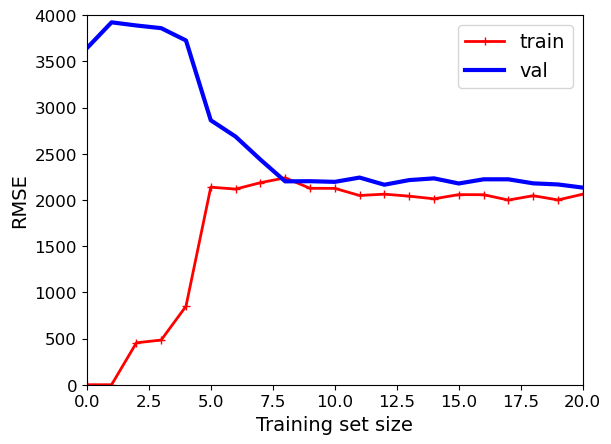

In [352]:
# Paramètres
rang=100
taille=0.4
# Construit un polynome
poly_features = createPoly(rang,False)
# Construit un modèle de regression sur ce polynome
lin_reg=regPoly(poly_features)
plot_learning_curves(lin_reg, taille)
plt.axis([0, total*taille, 0, 4000])                         
plt.show()  

# Exercice 3 - Regression logistique 

A partir de cookies de site web vous avez obtenu un ensemble de 100 informations sur 500 utilisateurs. Vous avez aussi obtenu l’information si oui ou non ces utilisateurs on acheté votre produit.
L’objectif de cet exercice est de savoir sur un ensemble de 5 nouveaux utilisateurs (A, B, C, D et E) vers lesquels vous allez envoyer de la publicité ciblée, c’est à dire vers lequel vous avez plus de chance de vendre votre produit.

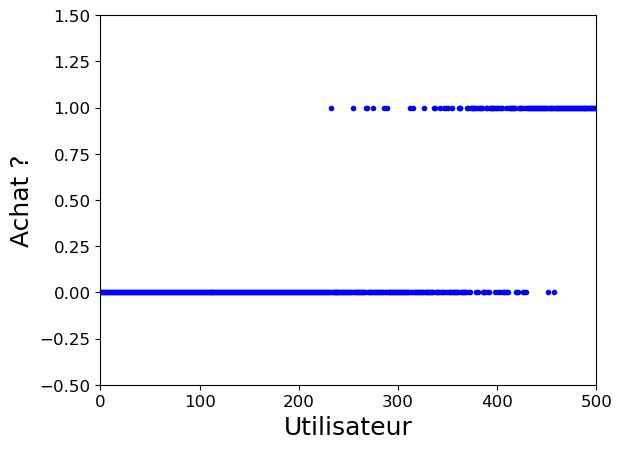

m=  500
n=  100


In [353]:
# Lecture du fichier avec les données récupérées par les cookies
arr=np.loadtxt('cookies1.csv', delimiter=',')
X=arr
# Nombre d'utilisateur
m=np.size(arr,0)
# Nombre de données récupérées par utilisateur
n=np.size(arr,1)
# Lecture du fichier pour savoir si les utilisateur on procédé à un achat (1 : oui, 0 : non)
arr=np.loadtxt('cookies2.csv', delimiter=',')
y=arr.reshape(m,1)
y=y[:,0]
# Affichage
X_b = np.arange(m)
plt.plot(X_b, y, "b.")
plt.xlabel("Utilisateur", fontsize=18)
plt.ylabel("Achat ?", fontsize=18)
plt.axis([0, m, -0.5, 1.5])
plt.show()
print("m= ",y.size)
print("n= ",n)

**QUESTION 3.1 :** Etant donné le nombre de paramètre, quelle méthode aller vous utiliser ?

m = 500
n = 100

**Méthode utilisée :** 
DG par mini-lots
**Justification :** 
Car il est un bon compromis entre le DG ordinaire lent sur des grand m , et le DG stochastique qui est très rapide mais qui ne converge pas toujours.

**QUESTION 3.2 :** Le code ci-dessous effectue une régulation linéaire sur les 100 paramètres. Chercher dans la [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) comment trouver les paramètres $\theta_i$.

Réponse :  [[ 8.43659178e-04 -3.23642061e-03  1.65502907e-03 -1.41597007e-03
   6.40497989e-04  2.65974128e-03 -4.90190935e-04  1.84920819e-03
  -8.83397135e-04 -2.70777635e-03  2.59560388e-03 -4.22350080e-03
  -4.08337493e-04  3.09933991e-03  1.44350324e-03  1.30133243e-03
  -6.90105428e-04  4.51303669e-03 -1.88948031e-04  9.88699033e-04
   1.78909009e-03 -2.48801648e-03 -8.52431601e-04  4.74337952e-04
   2.29356372e-03  2.99945437e-04 -1.88105707e-03 -1.11769063e-04
   5.84479630e-04 -9.87555700e-04  7.13206250e-04 -3.08480040e-03
   1.32533406e-03 -1.20434529e-03 -2.83615945e-03  1.67040311e-03
  -3.62894519e-03  1.54670647e-03 -4.41285262e-03  1.41150096e-04
  -2.15787655e-03 -1.96724624e-04 -1.07160809e-03  1.77988891e-03
  -1.93278519e-03  7.60672882e-04  9.03744903e-04 -1.56298962e-03
  -2.93751325e-03 -7.55053765e-04  6.78287902e-04 -3.41262648e-03
   1.40217073e-03 -4.55384751e-03 -1.82815479e-03 -2.18409006e-05
   6.66805091e-04  1.92482608e-03  1.93129876e-03 -5.64780225e-04

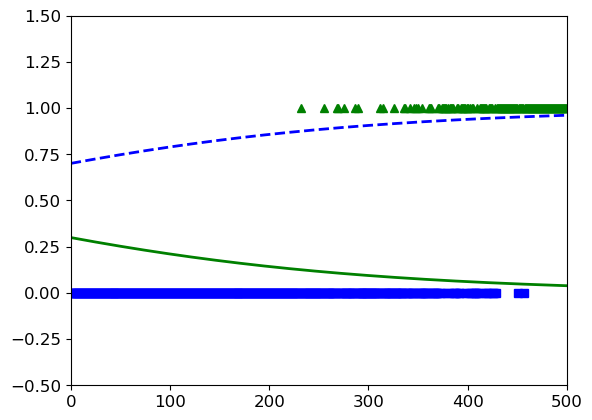

In [354]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="liblinear", random_state=5)
log_reg.fit(X, y) # X : données récupérées par les cookies, y : achat ou non
X_new = np.linspace(0, m, n*m).reshape(m, n) # m : nombre d'utilisateur, n : nombre de données récupérées par utilisateur
X_new.shape # X_new : données récupérées par les cookies
y_proba = log_reg.predict_proba(X_new) # y_proba : probabilité d'achat ou non
#decision_boundary = X_b[y_proba[:, 1] >= 0.5][0]

plt.plot(X_b[y==0], y[y==0], "bs") # y==0 : non acheteur
plt.plot(X_b[y==1], y[y==1], "g^") # y==1 : acheteur
plt.plot(X_b, y_proba[:, 1], "g-", linewidth=2, label="Acheteur") # y_proba[:, 1] : probabilité d'achat
plt.plot(X_b, y_proba[:, 0], "b--", linewidth=2, label="Non acheteur") # y_proba[:, 0] : probabilité de non achat
#plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.axis([0, m, -0.5, 1.5])
# print theta
print("Réponse : ",log_reg.coef_)


**QUESTION 3.3 :** En fonction des utilisateurs A, B, C, D et E, dire ceux qui ont des grandes chances d'être des clients.

In [355]:
arr=np.loadtxt('A.csv', delimiter=',')
A=arr.reshape(1,n)
arr=np.loadtxt('B.csv', delimiter=',')
B=arr.reshape(1,n)
arr=np.loadtxt('C.csv', delimiter=',')
C=arr.reshape(1,n)
arr=np.loadtxt('D.csv', delimiter=',')
D=arr.reshape(1,n)
arr=np.loadtxt('E.csv', delimiter=',')
E=arr.reshape(1,n)



In [356]:
print("A : ",log_reg.predict(A)[0] == 1)
print("B : ",log_reg.predict(B)[0] == 1)
print("C : ",log_reg.predict(C)[0] == 1)
print("D : ",log_reg.predict(D)[0] == 1)
print("E : ",log_reg.predict(E)[0] == 1)

A :  True
B :  True
C :  True
D :  False
E :  False
